In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


'''classification for Max Price Category VS Weather'''

'classification for Max Price Category VS Weather'

In [2]:
# read csv file
dataset = pd.read_csv('combined_detail_cleaned.csv')

# Selecting features
features = dataset[['temperature_min','rainfall', 
                    'sunshine', 'max_wind_speed']]

classlabel = dataset['max_price_category']


In [3]:
x_times = 3
    
# Split Training and Test sets
features_train, feature_test, class_train, class_test = train_test_split(
    features, classlabel, train_size=0.8, random_state=1)

# Scaling the features
scalar = preprocessing.StandardScaler().fit(features_train)
features_train = scalar.transform(features_train)
feature_test = scalar.transform(feature_test)

# Step 1: Instantiate 
dt = DecisionTreeClassifier(
    criterion='entropy', random_state=88, max_depth = x_times)

# Step 2: Fit
dt.fit(features_train, class_train)

# Step 3: Predict
predictions = dt.predict(feature_test)

# Step 4: Evaluate
my_score=accuracy_score(class_test, predictions)
print(f'The Accuracy Score with Max depth of {x_times} is {my_score}')

The Accuracy Score with Max depth of 3 is 0.46938775510204084


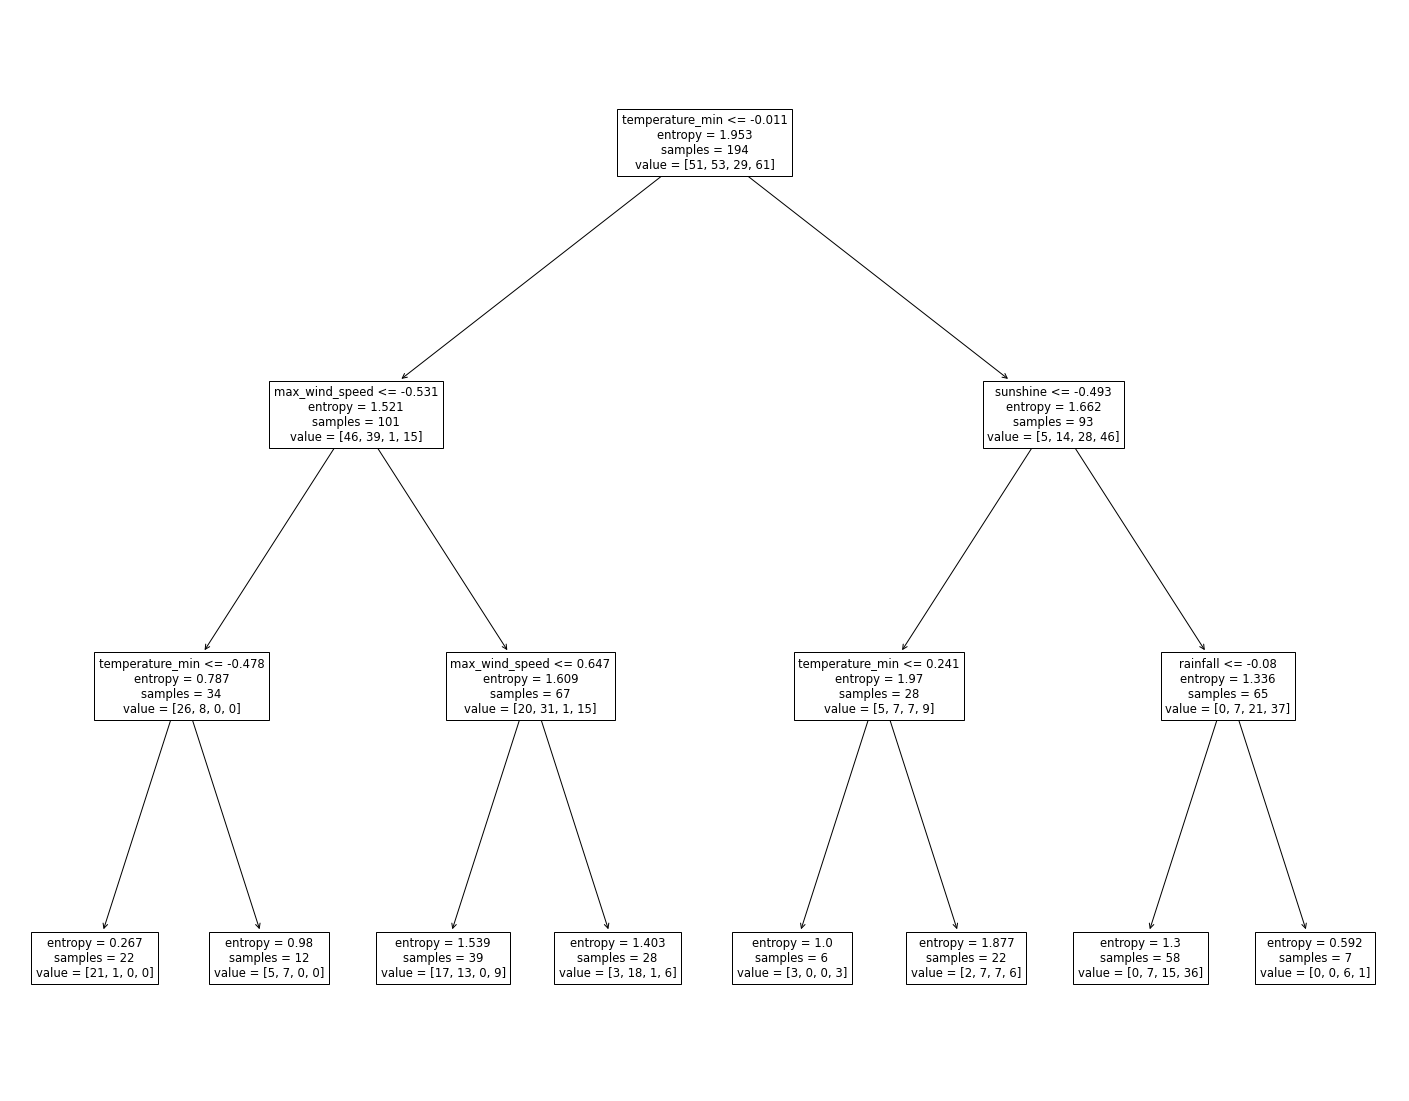

In [4]:
# Plot
plt.figure(figsize=(25, 20))
featurenames = ['temperature_min', 'rainfall', 'sunshine', 'max_wind_speed']
tree.plot_tree(dt, feature_names=featurenames)
plt.show()